In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.feature_selection import VarianceThreshold
import math
from sklearn.preprocessing import MinMaxScaler


# Data preprocessing

In [2]:
df_train = pd.read_csv('SWaT_Dataset_Normal_v0.csv')
df_train.columns = df_train.columns.str.strip()

df_test = pd.read_csv('SWaT_Dataset_Attack_v0.csv')
df_test.columns = df_test.columns.str.strip()
df = pd.concat([df_train, df_test])

print("Combined data size:", df.shape)
print("Data train size:", df_train.shape)
print("Data test size:", df_test.shape)

Combined data size: (946719, 53)
Data train size: (496800, 53)
Data test size: (449919, 53)


In [3]:
df = df[:600000]

In [4]:
df.head(-5)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103190,29/12/2015 2:39:50 PM,2.444352,502.0428,2,2,1,260.1577,8.408934,331.2484,2.448723,...,2,1,252.17890,1.457726,190.464000,0.000128,1,1,1,Attack
103191,29/12/2015 2:39:51 PM,2.425456,502.0428,2,2,1,260.1577,8.408934,331.2484,2.448723,...,2,1,252.17890,1.457726,190.464000,0.000128,1,1,1,Attack
103192,29/12/2015 2:39:52 PM,2.420651,501.8465,2,2,1,260.1577,8.407331,331.2484,2.448723,...,2,1,252.17890,1.457726,190.464000,0.000128,1,1,1,Attack
103193,29/12/2015 2:39:53 PM,2.420651,501.8465,2,2,1,260.1577,8.407331,331.2484,2.448723,...,2,1,252.17890,1.457726,190.464000,0.000128,1,1,1,Attack


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.rename(columns = {'Timestamp':'Date'}, inplace = True)

In [6]:
df = df.set_index('Date')
df.head(-5)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29 14:39:50,2.444352,502.0428,2,2,1,260.1577,8.408934,331.2484,2.448723,2,...,2,1,252.17890,1.457726,190.464000,0.000128,1,1,1,Attack
2015-12-29 14:39:51,2.425456,502.0428,2,2,1,260.1577,8.408934,331.2484,2.448723,2,...,2,1,252.17890,1.457726,190.464000,0.000128,1,1,1,Attack
2015-12-29 14:39:52,2.420651,501.8465,2,2,1,260.1577,8.407331,331.2484,2.448723,2,...,2,1,252.17890,1.457726,190.464000,0.000128,1,1,1,Attack


In [7]:
df.duplicated().sum() 

11520

In [8]:
df.isnull().sum()/len(df)*100

FIT101           0.0
LIT101           0.0
MV101            0.0
P101             0.0
P102             0.0
AIT201           0.0
AIT202           0.0
AIT203           0.0
FIT201           0.0
MV201            0.0
P201             0.0
P202             0.0
P203             0.0
P204             0.0
P205             0.0
P206             0.0
DPIT301          0.0
FIT301           0.0
LIT301           0.0
MV301            0.0
MV302            0.0
MV303            0.0
MV304            0.0
P301             0.0
P302             0.0
AIT401           0.0
AIT402           0.0
FIT401           0.0
LIT401           0.0
P401             0.0
P402             0.0
P403             0.0
P404             0.0
UV401            0.0
AIT501           0.0
AIT502           0.0
AIT503           0.0
AIT504           0.0
FIT501           0.0
FIT502           0.0
FIT503           0.0
FIT504           0.0
P501             0.0
P502             0.0
PIT501           0.0
PIT502           0.0
PIT503           0.0
FIT601       

In [9]:
for c in df.columns[:-2]:
    df[c]=pd.to_numeric(df[c])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600000 entries, 2015-12-22 16:00:00 to 2015-12-29 14:39:59
Data columns (total 52 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FIT101         600000 non-null  float64
 1   LIT101         600000 non-null  float64
 2   MV101          600000 non-null  int64  
 3   P101           600000 non-null  int64  
 4   P102           600000 non-null  int64  
 5   AIT201         600000 non-null  float64
 6   AIT202         600000 non-null  float64
 7   AIT203         600000 non-null  float64
 8   FIT201         600000 non-null  float64
 9   MV201          600000 non-null  int64  
 10  P201           600000 non-null  int64  
 11  P202           600000 non-null  int64  
 12  P203           600000 non-null  int64  
 13  P204           600000 non-null  int64  
 14  P205           600000 non-null  int64  
 15  P206           600000 non-null  int64  
 16  DPIT301        600000 non-null  float64


# Feature selection

Drop columns with only one distinct value

In [11]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [12]:
df.shape

(600000, 42)

In [13]:
df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602,Normal/Attack
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,Normal
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,2,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,Normal
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,2,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,Normal
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,2,...,0.001409,0.001664,0.0,1,10.02948,0.0,4.277749,0.000256,1,Normal


# Numerical and Categorical columns :

In [14]:
target_column = df['Normal/Attack']
df = df.drop(['Normal/Attack'],axis=1)

In [15]:
df.nunique()

FIT101      3105
LIT101     11063
MV101          3
P101           2
P102           2
AIT201       549
AIT202      1697
AIT203      5696
FIT201      3435
MV201          3
P203           2
P205           2
DPIT301     4983
FIT301      6846
LIT301     10404
MV301          3
MV302          3
MV303          3
MV304          3
P301           2
P302           2
AIT401        37
AIT402      2476
FIT401       721
LIT401     12379
P402           2
UV401          2
AIT501      1019
AIT502      2325
AIT503       829
AIT504       381
FIT501       795
FIT502      1361
FIT503       365
FIT504       220
P501           2
PIT501      1124
PIT502       102
PIT503      1044
FIT601      4264
P602           2
dtype: int64

In [16]:
cat_col = []
num_col = []

for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values > 10:
        num_col.append(column)
    else:
        cat_col.append(column)

In [17]:
# One-Hot Encoding to Categorical features
one_hot_encoded_data = pd.get_dummies(df, columns=cat_col)
processed_df = one_hot_encoded_data.copy()

# Scale numerical columns
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(processed_df[num_col])

df_num = pd.DataFrame(x_scaled, index=processed_df.index, columns=num_col)

df_ = pd.concat([df_num, processed_df.drop(columns=num_col)], axis=1)

df_.head()

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,P302_1,P302_2,P402_1,P402_2,UV401_1,UV401_2,P501_1,P501_2,P602_1,P602_2
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,0.899895,0.160292,0.000000,0.732892,0.01971,0.881071,0.462186,0.947643,0.182370,0.0,...,1,0,1,0,1,0,1,0,1,0
2015-12-22 16:00:01,0.895111,0.159845,0.000000,0.732892,0.01971,0.880112,0.462186,0.947317,0.182370,0.0,...,1,0,1,0,1,0,1,0,1,0
2015-12-22 16:00:02,0.888694,0.159533,0.000000,0.732892,0.01971,0.879654,0.463182,0.946828,0.182370,0.0,...,1,0,1,0,1,0,1,0,1,0
2015-12-22 16:00:03,0.884611,0.158819,0.000000,0.732892,0.01971,0.879380,0.463182,0.946828,0.182220,0.0,...,1,0,1,0,1,0,1,0,1,0
2015-12-22 16:00:04,0.883327,0.158372,0.003408,0.732892,0.01971,0.879380,0.463182,0.946828,0.182107,0.0,...,1,0,1,0,1,0,1,0,1,0


# Features selection

Data normalization

In [18]:
# Create a PCA object with n_components=15
pca = PCA(n_components=15)

reduced_data = pca.fit_transform(df_)
df_ae=pd.DataFrame(reduced_data)

In [19]:
df_ae['Timestamp'] = pd.to_datetime(df.index)

In [20]:
df_ae=df_ae.set_index('Timestamp')

In [21]:
df_ae.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Timestamp,,,,,,,,,,,,,,,
2015-12-22 16:00:00,-0.504060,0.781904,0.425320,1.256681,2.748109,2.569127,0.472853,0.148781,-0.146257,0.758581,0.121967,0.452945,-0.146820,-0.252346,-0.375933
2015-12-22 16:00:01,-0.503502,0.779958,0.426885,1.256884,2.748213,2.568962,0.472794,0.148812,-0.146189,0.758528,0.121854,0.452897,-0.146904,-0.252371,-0.375874
2015-12-22 16:00:02,-0.503017,0.777272,0.428966,1.257272,2.748356,2.568712,0.472739,0.148865,-0.146170,0.758578,0.121842,0.452735,-0.147062,-0.252424,-0.375778
2015-12-22 16:00:03,-0.502758,0.775602,0.430270,1.257540,2.748446,2.568627,0.472690,0.148921,-0.146190,0.758572,0.121904,0.452657,-0.147135,-0.252442,-0.375726
2015-12-22 16:00:04,-0.502732,0.775109,0.430715,1.257254,2.748256,2.568272,0.472702,0.151273,-0.145225,0.758852,0.122579,0.452250,-0.147104,-0.252381,-0.375685


In [22]:
df_ae.shape

(600000, 15)

# Autoencoder

In [23]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

df_train = df_ae.iloc[:496800, :]
df_test = df_ae.iloc[496800:, :]
target_values = target_column .iloc[496800:]

In [24]:
print(df_train.shape)
print(df_test.shape)
print(target_values.shape)

(496800, 15)
(103200, 15)
(103200,)


In [25]:
def create_autoencoder(df_ae, encoding_dim=8):
    
    df_ae = df_ae.sort_index()
    num_rows = df_ae.shape
    num_cols = df_ae.shape[1]
    df_training_train = df_ae
    input_layer = Input(shape=(num_cols,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    decoder = Dense(num_cols, activation="sigmoid")(encoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    return autoencoder

In [26]:
ae_autoencoder = create_autoencoder(df_ae, encoding_dim=10)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 10)                160       
                                                                 
 dense_1 (Dense)             (None, 15)                165       
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = ae_autoencoder.fit(df_train, df_train,
                epochs=10,
                batch_size=32,
                validation_split=0.2)

Epoch 1/10
12420/12420 [==============================] - 30s 2ms/step - loss: 0.1345 - val_loss: 0.1163
Epoch 2/10
12420/12420 [==============================] - 29s 2ms/step - loss: 0.1234 - val_loss: 0.1155
Epoch 3/10
12420/12420 [==============================] - 24s 2ms/step - loss: 0.1228 - val_loss: 0.1153
Epoch 4/10
12420/12420 [==============================] - 23s 2ms/step - loss: 0.1227 - val_loss: 0.1153
Epoch 5/10
12420/12420 [==============================] - 21s 2ms/step - loss: 0.1226 - val_loss: 0.1150
Epoch 6/10
12420/12420 [==============================] - 30s 2ms/step - loss: 0.1224 - val_loss: 0.1149
Epoch 7/10
12420/12420 [==============================] - 22s 2ms/step - loss: 0.1224 - val_loss: 0.1149
Epoch 8/10
12420/12420 [==============================] - 21s 2ms/step - loss: 0.1224 - val_loss: 0.1149
Epoch 9/10
12420/12420 [==============================] - 22s 2ms/step - loss: 0.1224 - val_loss: 0.1149
Epoch 10/10
12420/12420 [==============================

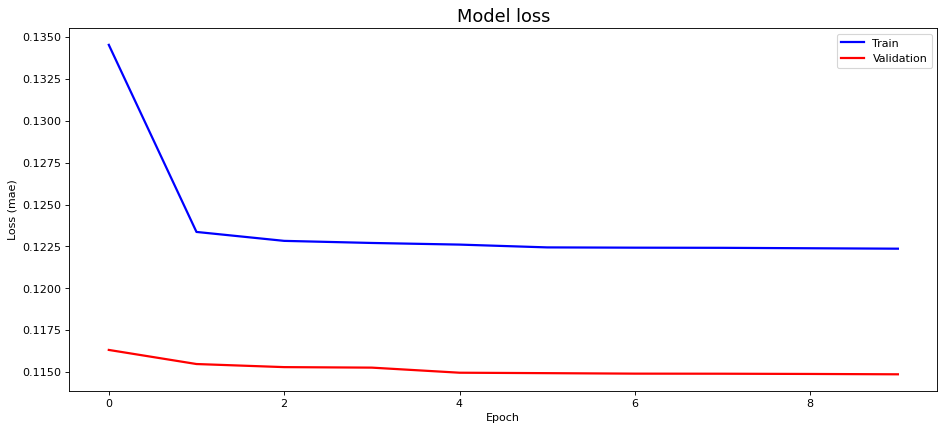

In [28]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [29]:
df_test_pred = ae_autoencoder.predict(df_test)
mse = np.mean(np.power(df_test - df_test_pred, 2), axis=1)
print('Test MSE:', np.mean(mse))


3225/3225 [==============================] - 5s 1ms/step
Test MSE: 0.11922823769527768


In [30]:
import sklearn.metrics as metrics
threshold = np.quantile(mse, 0.97)
y_pred = [1 if e > threshold else 0 for e in mse]
y_true = [1 if x == 'Attack' else 0 for x in target_values]
accuracy = accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.9219089147286822
Precision: 0.2054263565891473
Recall: 0.10200481154771451
F1-Score: 0.13631979423427287


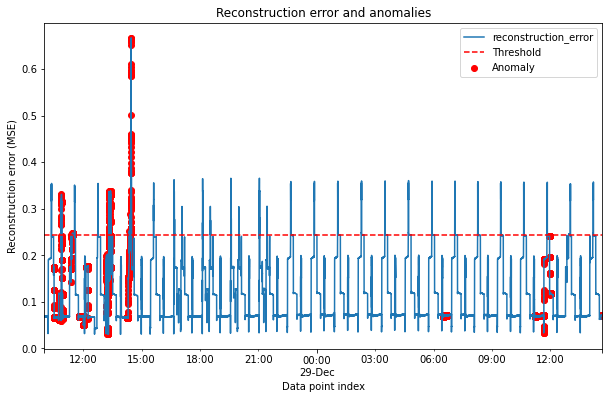

In [31]:
import matplotlib.pyplot as plt

viz_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_true})
fig, ax = plt.subplots(figsize=(10, 6))
viz_df['reconstruction_error'].plot(kind='line', ax=ax)
ax.axhline(threshold, color='r', linestyle='--', label='Threshold')
anomalies = viz_df[viz_df['true_class'] == 1]
ax.scatter(anomalies.index, anomalies['reconstruction_error'], color='red', label='Anomaly')
ax.set_title('Reconstruction error and anomalies')
ax.set_xlabel('Data point index')
ax.set_ylabel('Reconstruction error (MSE)')
ax.legend()

plt.show()


# Vae Autoencoder

In [32]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda

def create_vae(df_ae, encoding_dim=8):
    
    df_ae = df_ae.sort_index()
    num_rows, num_cols  = df_ae.shape
    df_training_train = df_ae
    input_layer = Input(shape=(num_cols,))
    encoded = Dense(encoding_dim, activation="relu")(input_layer)
    z_mean = Dense(encoding_dim)(encoded)
    z_log_var = Dense(encoding_dim)(encoded)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], encoding_dim), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, output_shape=(encoding_dim,))([z_mean, z_log_var])
    decoded = Dense(num_cols, activation="sigmoid")(z)
    vae = Model(inputs=input_layer, outputs=decoded)
    reconstruction_loss = K.sum(K.square(input_layer - decoded), axis=-1)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    vae.summary()
    
    return vae


In [33]:
vae_autoencoder = create_vae(df_ae, encoding_dim=10)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 10)           160         ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 10)           110         ['dense_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 10)           110         ['dense_2[0][0]']                
                                                                                            

In [34]:
history_vae = vae_autoencoder.fit(df_train, df_train,
                epochs=10,
                batch_size=64,
                validation_split=0.2)

Epoch 1/10
6210/6210 [==============================] - 15s 2ms/step - loss: 4.1298 - val_loss: 3.0863
Epoch 2/10
6210/6210 [==============================] - 14s 2ms/step - loss: 3.4589 - val_loss: 3.0210
Epoch 3/10
6210/6210 [==============================] - 14s 2ms/step - loss: 3.4129 - val_loss: 2.9795
Epoch 4/10
6210/6210 [==============================] - 16s 3ms/step - loss: 3.3828 - val_loss: 2.9686
Epoch 5/10
6210/6210 [==============================] - 15s 2ms/step - loss: 3.3737 - val_loss: 2.9645
Epoch 6/10
6210/6210 [==============================] - 14s 2ms/step - loss: 3.3684 - val_loss: 2.9578
Epoch 7/10
6210/6210 [==============================] - 16s 3ms/step - loss: 3.3637 - val_loss: 2.9509
Epoch 8/10
6210/6210 [==============================] - 14s 2ms/step - loss: 3.3593 - val_loss: 2.9472
Epoch 9/10
6210/6210 [==============================] - 13s 2ms/step - loss: 3.3572 - val_loss: 2.9457
Epoch 10/10
6210/6210 [==============================] - 13s 2ms/step - l

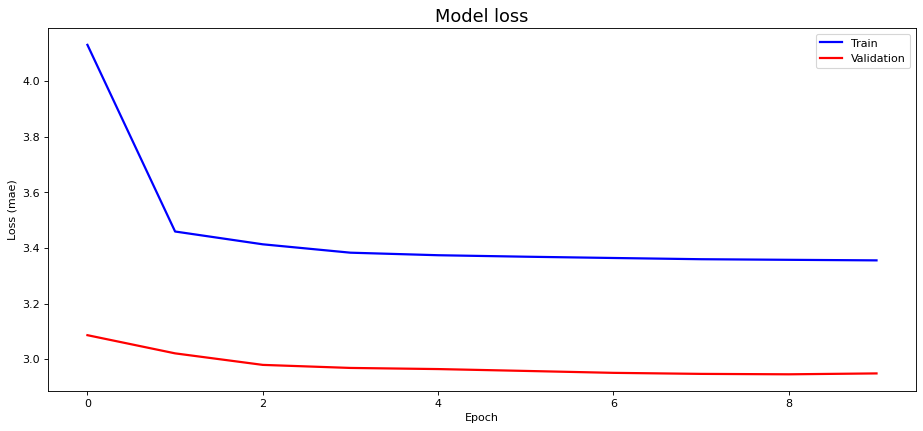

In [35]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history_vae.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history_vae.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [36]:
df_test_pred_vae = vae_autoencoder.predict(df_test)
mse = np.mean(np.power(df_test - df_test_pred_vae, 2), axis=1)
print('Test MSE:', np.mean(mse))

3225/3225 [==============================] - 5s 2ms/step
Test MSE: 0.17547192877047296


In [37]:
import sklearn.metrics as metrics
threshold = np.quantile(mse, 0.99)  
y_pred = [1 if e > threshold else 0 for e in mse]
y_true = [1 if x == 'Attack' else 0 for x in target_values]
accuracy = accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Accuracy: 0.9351453488372093
Precision: 0.27810077519379844
Recall: 0.04603047313552526
F1-Score: 0.07898720242190725


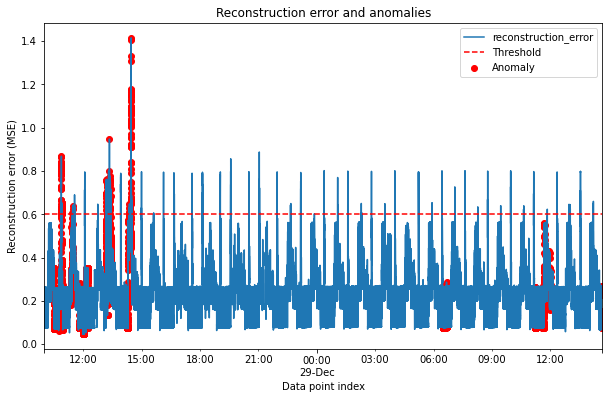

In [38]:
import matplotlib.pyplot as plt

viz_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_true})
fig, ax = plt.subplots(figsize=(10, 6))
viz_df['reconstruction_error'].plot(kind='line', ax=ax)
ax.axhline(threshold, color='r', linestyle='--', label='Threshold')
anomalies = viz_df[viz_df['true_class'] == 1]
ax.scatter(anomalies.index, anomalies['reconstruction_error'], color='red', label='Anomaly')
ax.set_title('Reconstruction error and anomalies')
ax.set_xlabel('Data point index')
ax.set_ylabel('Reconstruction error (MSE)')
ax.legend()
plt.show()
